In [1]:
import tacos  as tc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1.- Multivariable Linear Regression by least Squares:
The simplest example of a least squares approximation is fitting a line to a set of observations defined by points: $ (x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ $=  [x_i,y_i ....i=n]$ to the mathematical expression for a stright line:  
$$y=\theta_2x2 + \theta_1x1 + \theta_0x0$$

$$ y= \Theta X^T = \Theta \begin{bmatrix}
- & x_1^{T} & -\\
- & x_2^{T} & -  \\
- & . & - \\
- & . & - \\
- & . & - \\
- & x_m^{T} & - \\
\end{bmatrix}$$
where $e$ is the error or difference of the model with rispect to the observations: $ e = y-a_o-a_1x $
<br>

In [12]:
#### Unvectorized Implementation ####

def gradient_descent_linear_regression(x,y,a,iteration):
    m=len(y)
    theta_0= np.random.random(1)
    theta_1= np.random.random(1)
    error=np.zeros(iter)
    
    for j in range(0,iteration): 
        h=theta_1*x + theta_0
        e0=0
        e1=0

        for i in range(0,len(y)):
            e0= e0 + h[i]-y[i]
            e1= e1 + (h[i]-y[i])*x[i]
            
        theta_0= theta_0 - ((a/m)*e0)
        theta_1= theta_1 - ((a/m)*e1)
       

    
    return (theta_0,theta_1)

def gradient_descent_multiveriable_linear_regression(X,Y,a,iteration):
 
    m=len(Y)
    x0=X[:,0]
    x1=X[:,1]
    x2=X[:,2]
    theta_0= np.random.random(1)
    theta_1= np.random.random(1)
    theta_2= np.random.random(1)
    error=np.zeros(iter)
    
    for j in range(0,iter): 
        
        h=theta_2*x2 + theta_1*x1 + theta_0*x0
        e0=0
        e1=0
        e2=0
        
        for k in range(0,m):
            error[j]= error[j] + (h[k]-Y[k])**2
        error[j]= error[j]/(2*m)
            
        
        for i in range(0,m):
            e0= e0 + (h[i]-Y[i])*x0[i]
            e1= e1 + (h[i]-Y[i])*x1[i]
            e2= e1 + (h[i]-Y[i])*x2[i]
            
        theta_0= theta_0 - ((a/m)*e0)
        theta_1= theta_1 - ((a/m)*e1)
        theta_2= theta_2 - ((a/m)*e2)
    
    return (theta_0,theta_1,theta_2,error)


def add_ones(data):
    n=data.shape[0]
    m=data.shape[1]
    n_m=np.ones([n,m+1])
    n_m=n_m.astype('float64')
    for j in range(0,m):
        for i in range(0,n):
            n_m[i,j+1]=data[i,j]
    return n_m

In [75]:
##### Vecotrized Implementation ####
### Define Norms and their Respective Gradients ####

## L2 NORM ###
def L2_Norm(X,y,W):
    N = len(X)
    return 1/N*((X.dot(W) - y)**2).sum()

def L2_Norm_gradient(X,y,W):
    N = len(X)
    return (2/N)*(X.T).dot(X.dot(W) - y)


def L2_Norm_Gradient_descent(X,y,W,a,epochs):
    loss=[]
    N = len(y)
    for i in range(0,epochs):
         ### Compute gradient ###
        dW = L2_Norm_gradient(X,y,W)
        
        ### Gradient Descent ###
        W = W - a*dW
        
        loss.append(a*L2_Norm(X,y,W))
    
    y_hat = X.dot(W)
    y_mean = y.sum()/N
    st = ((y-y_mean)**2).sum()   # Standar deviation  of data
    sr = ((y-y_hat)**2 ).sum()   # standard deviation of prediction
    r2   = (st-sr)/st            # R2 coefficient
    
    return W,loss,r2
        
    

        
def plot_loss(loss,X,y,W,r2,name="L2"):
   
    fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
    
    ### PLOT LOSS ###
    iterations = list(range(0,len(loss)))
    ax[0].plot(iterations,loss,"b--",label ="loss")
    ax[0].legend(loc="lower right")
    ax[0].set_xlabel("iterations")
    ax[0].set_ylabel("loss ")
    ax[0].set_title(f"Linear Regression with {name} Norm loss={loss[-1]:2f}")
    ax[0].grid("on")
    
    ### PLOT  Data ###
    y_hat = X.dot(W)
    x = X[:,1]
    ax[1].plot(x,y_hat,"b--",label ="prediction")
    ax[1].plot(x,y,"r*",label='data')
    ax[1].legend(loc="lower right")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].set_title(f"Linear Regression with {name} Norm:  r2={r2:2f}")
    plt.grid("on")
    plt.show()

######  Before starting with multivariable  linear regression lets solve a bigdata  linear regresion $ h= \theta_1x1 + \theta_0 $ problem

In [76]:
data = pd.read_csv(r'datasets\ex1data1.txt') 
data_n = data.values
x=data_n[:,0]
y=data_n[:,1]
data.head() #showing data head

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


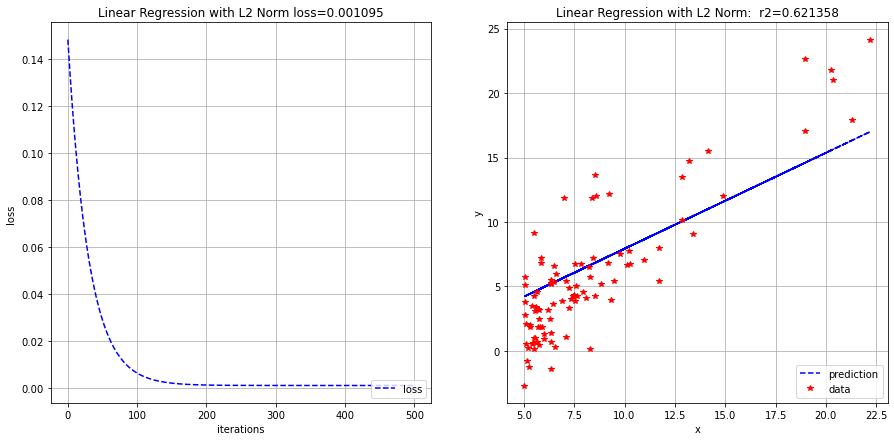

In [77]:
x0 = np.ones_like(x)
X  = np.stack((x0,x)).T
y1 = y.reshape(-1,1)

W = np.array([[1],[5]])                                           # Intial Guess For W
W, loss,r2 = L2_Norm_Gradient_descent(X,y1,W,a=0.0001,epochs=500) # Compute Gradient Descent with L2 Norm
plot_loss(loss,X,y1,W,r2,name="L2")

In [80]:
data = pd.read_csv(r'datasets\ex1data2.txt') 
data_n=data.values
data.head() #showing data head

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [81]:
data_s=tc.standarization(data_n)
data_s=add_ones(data_s)
df = pd.DataFrame(data=data_s,columns=["x0", "x1","x2","y"])
df.head()

,x0,x1,x2,y
0,1.0,-0.501458,-0.228665,-0.073918
1,1.0,0.505398,-0.228665,0.239571
2,1.0,-0.733034,-1.543487,-0.858844
3,1.0,1.260539,1.086158,1.609783
4,1.0,-0.016909,1.086158,-0.314447


In [82]:
x=data_s[:,:-1]
y=data_s[:,-1]
y1 = y.reshape(-1,1)
print(x.shape)
print(y1.shape)

(46, 3)
(46, 1)


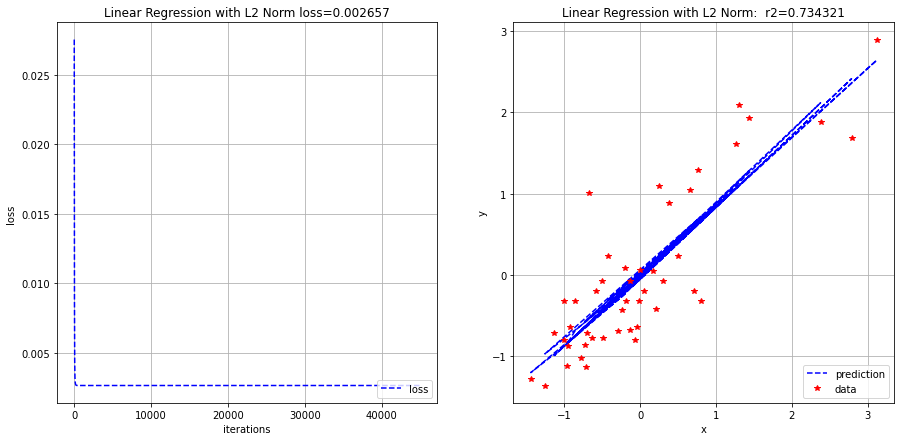

In [83]:
W = np.array([[1],[2],[0.2]])                                           # Intial Guess For W
W, loss,r2 = L2_Norm_Gradient_descent(x,y1,W,a=0.01,epochs=45000) # Compute Gradient Descent with L2 Norm
plot_loss(loss,x,y1,W,r2,name="L2")

## 2.- Linear Regression by Ortogonal Proyections:
In General we can write a function:
$$n=a_0+a_1x+a_2x^2 + ... + a_mx^m + e$$
as:
$$ Xa=y $$

where $ X = [1^T x^T x^{2T} ... x^{nT}]  \in R^{nxm}$ and $ y \in R^{nx1} $ , $n=$ Number of data points , $m=$ Degree of polynomial.

How to solve this?
$$ X^TXa=X^Ty $$
Therfore:
$$ a=(X^TX)^{-1}X^Ty $$

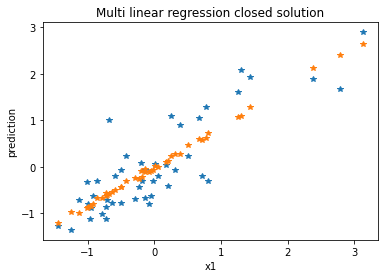

In [94]:
### close solutio
T=((np.linalg.inv(x.T.dot(x))).dot(x.T)).dot(y1)
plt.plot(x[:,1],y1,"*")
plt.plot(x[:,1],(T[2]*x[:,2] + T[1]*x[:,1] + T[0]*x[:,0]),"*")
plt.xlabel("x1")
plt.ylabel("prediction")
plt.title("Multi linear regression closed solution")
plt.show()